In [9]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
import sys
sys.path.append("../") # Enables importing from parent directory
from fpl_draft_league import charts
from fpl_draft_league import utils
from fpl_draft_league import fpl_draft_league as fpl
import matplotlib.pyplot as plt

In [16]:
league_entry_df = utils.get_data('league_entries')
matches_df = utils.get_data('matches')
standings_df = utils.get_data('standings')
stacked_df = fpl.get_matches_stacked(matches_df, league_entry_df)
streaks_df = fpl.get_streaks(stacked_df)

## Standings

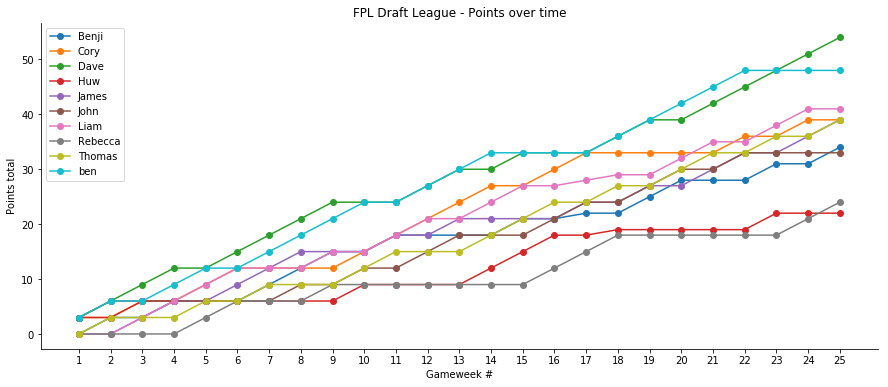

In [10]:
charts.chart_league_standings_history()

## Streaks

In [18]:
streaks_df[['team', 'streak']].groupby(['team']).max().sort_values(by='streak', ascending=False)

,streak
team,
Cory,5
Dave,5
ben,5
Liam,4
Benji,3
Huw,3
James,3
Rebecca,3
Thomas,3


In [25]:
final_df = streaks_df[streaks_df['match'] == streaks_df.match.max()].sort_values(by='streak', ascending=False)[['team', 'streak']]

In [46]:
final_df = final_df.sort_values(by='streak', ascending=True)

[Text(0, 0, 'John'),
 Text(0, 0, 'ben'),
 Text(0, 0, 'Huw'),
 Text(0, 0, 'Cory'),
 Text(0, 0, 'Liam'),
 Text(0, 0, 'Benji'),
 Text(0, 0, 'Thomas'),
 Text(0, 0, 'James'),
 Text(0, 0, 'Rebecca'),
 Text(0, 0, 'Dave')]

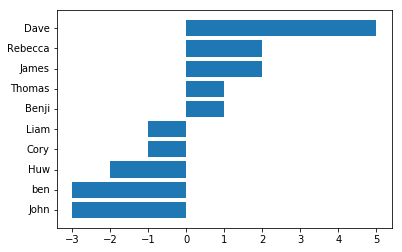

In [47]:
plt.figure()
plt.barh(range(10), final_df['streak'])
ax = plt.gca()
ax.set_yticks(range(10))
ax.set_yticklabels(final_df['team'], va='center')